</b> imports and connect to database

In [6]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)

</b> fetch the relevant records from the pums_2017 table

In [2]:
#fething oportunity youth in south king county

skc_OY_db = pd.read_sql('''
        SELECT *
        FROM pums_2017
        WHERE puma SIMILAR TO '1161(0|1|2|3|4|5)'
        AND agep >= 16
        AND agep <= 24
        AND sch = '1'
        AND esr SIMILAR TO '%(3|6)%'
        
''', conn)
skc_OY_db

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000118713,9,03,11613,4,53,1061971,25.0,23.0,...,26.0,25.0,29.0,6.0,24.0,26.0,25.0,41.0,24.0,43.0
1,P,2013000121584,9,02,11611,4,53,1061971,19.0,18.0,...,17.0,21.0,32.0,17.0,5.0,12.0,7.0,4.0,30.0,21.0
2,P,2013000155051,9,03,11614,4,53,1061971,2.0,19.0,...,1.0,3.0,3.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0
3,P,2013000128172,9,01,11612,4,53,1061971,118.0,23.0,...,117.0,171.0,181.0,52.0,106.0,143.0,111.0,32.0,94.0,168.0
4,P,2013000166503,9,03,11610,4,53,1061971,41.0,21.0,...,54.0,72.0,37.0,58.0,11.0,11.0,37.0,48.0,45.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,P,2013000106284,9,01,11614,4,53,1061971,4.0,23.0,...,4.0,5.0,4.0,6.0,8.0,5.0,5.0,1.0,1.0,3.0
387,P,2013000111689,9,05,11610,4,53,1061971,40.0,19.0,...,61.0,12.0,51.0,12.0,13.0,41.0,37.0,52.0,32.0,36.0
388,P,2013000058010,9,02,11614,4,53,1061971,45.0,17.0,...,20.0,56.0,51.0,39.0,40.0,52.0,17.0,48.0,51.0,54.0
389,P,2013000067168,9,03,11615,4,53,1061971,22.0,24.0,...,7.0,20.0,24.0,23.0,41.0,7.0,24.0,24.0,33.0,19.0


In [18]:
#fetching all residents from south king county within the OY age group

skc_allRes_db = pd.read_sql('''
        SELECT *
        FROM pums_2017
        WHERE puma SIMILAR TO '1161(0|1|2|3|4|5)'
        AND agep >= 16
        AND agep <= 24
''', conn)
skc_allRes_db

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000115983,9,03,11614,4,53,1061971,4.0,16.0,...,4.0,2.0,4.0,5.0,6.0,8.0,0.0,1.0,7.0,8.0
1,P,2013000115983,9,06,11614,4,53,1061971,7.0,24.0,...,6.0,2.0,7.0,8.0,15.0,13.0,2.0,1.0,9.0,11.0
2,P,2013000118713,9,03,11613,4,53,1061971,25.0,23.0,...,26.0,25.0,29.0,6.0,24.0,26.0,25.0,41.0,24.0,43.0
3,P,2013000121584,9,02,11611,4,53,1061971,19.0,18.0,...,17.0,21.0,32.0,17.0,5.0,12.0,7.0,4.0,30.0,21.0
4,P,2013000121584,9,03,11611,4,53,1061971,18.0,18.0,...,17.0,21.0,32.0,18.0,5.0,11.0,7.0,3.0,30.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,P,2013000106284,9,01,11614,4,53,1061971,4.0,23.0,...,4.0,5.0,4.0,6.0,8.0,5.0,5.0,1.0,1.0,3.0
3478,P,2013000106963,9,02,11612,4,53,1061971,43.0,19.0,...,15.0,50.0,43.0,41.0,15.0,28.0,41.0,57.0,53.0,18.0
3479,P,2013000106963,9,03,11612,4,53,1061971,24.0,16.0,...,7.0,25.0,38.0,23.0,7.0,25.0,31.0,19.0,34.0,9.0
3480,P,2013000111689,9,05,11610,4,53,1061971,40.0,19.0,...,61.0,12.0,51.0,12.0,13.0,41.0,37.0,52.0,32.0,36.0


In [4]:
#checking percentage of 16-24 year olds in skc who qualify as OY
#output is: percentage | # of OY in SKC | # of 16-24 year olds in SKC

print((sum(skc_OY_db['pwgtp'])/sum(skc_allRes_db['pwgtp']))*100, sum(skc_OY_db['pwgtp']), sum(skc_allRes_db['pwgtp']))

12.358674009990334 10614.0 85883.0


<b> create two subplots: one for each half of the OY status by age table

In [13]:
#create row and column labels for the total_pop table

tpop_columns = ['16-18', '19-21', '22-24', 'Totals']
tpop_rows = ['Total Poulation', 'Opportunity Youth', 'Working Without Diploma', 'Not an Opportunity Youth']

#create row and column labels for the opporunity_youth table

oy_columns = ['16-18', '19-21', '22-24', 'Totals']
oy_rows = ['Oppurtunity Youth', 'No Diploma', 'Highschool Diploma or GED', 'Some College/ No Degree', 'Degree (Associate or Higher)']


In [50]:
#gather totals and percentages from colected data

age_ranges = [(16, 18), (19, 21), (22, 24)]
tpop_data = []
oy_data = []

#store totals for each age group for both tables
tpop_data.append([])
oy_data.append([])
total_tpop = 0
total_oy = 0
age_groupT_dfs = []
age_groupOY_dfs = []
for age_range in age_ranges:
    age_groupT_dfs.append(skc_allRes_db.loc[lambda db: (db['agep'] >= age_range[0]) & (db['agep'] <= age_range[1])])
    age_groupOY_dfs.append(skc_OY_db.loc[lambda db: (db['agep'] >= age_range[0]) & (db['agep'] <= age_range[1])])
for index in range(0, 3):
    tpop_total = age_groupT_dfs[index]['pwgtp'].sum()
    oy_total = age_groupOY_dfs[index]['pwgtp'].sum()
    tpop_data[0].append(['100%', tpop_total])
    total_tpop += tpop_total
    oy_data[0].append(['100%', oy_total])
    total_oy += oy_total
tpop_data[0].append(['100%', total_tpop])
oy_data[0].append(['100%', total_oy])

#fill in the rows for the total_pop table

#OY row values and percentages
oy_row = []
wnd_row = []
not_oy_row = []
for index in range(0, 3):
    wnd_mask = ((age_groupT_dfs[index]['esr'] == '1') | (age_groupT_dfs[index]['esr'] == '4')) & ((age_groupT_dfs[index]['schl'] == '14') | (age_groupT_dfs[index]['schl'] == '15'))
    wnd_df = age_groupT_dfs[index].loc[wnd_mask]
    not_oy_df = age_groupT_dfs[index].loc[wnd_mask ^ True]
    oy_row.append([f'{round((oy_data[0][index][1] / tpop_data[0][index][1]) * 100, 1)}%', oy_data[0][index][1]])
    wnd_total = wnd_df['pwgtp'].sum()
    wnd_row.append([f'{round((wnd_total / tpop_data[0][index][1]) * 100, 1)}%', wnd_total])
tpop_data.append(oy_row)
tpop_data.append(wnd_row)
tpop_data

[[['100%', 30141.0], ['100%', 25486.0], ['100%', 30256.0], ['100%', 85883.0]],
 [['6.0%', 1815.0], ['15.3%', 3902.0], ['16.2%', 4897.0]],
 [['8.8%', 2655.0], ['4.1%', 1045.0], ['3.0%', 914.0]]]

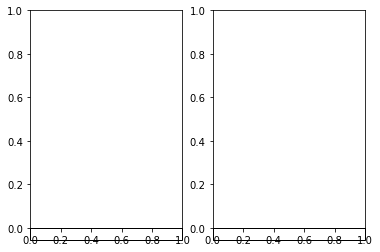

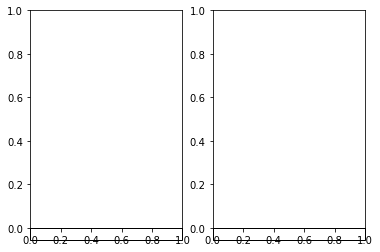

In [12]:
fig, (tpop_ax, oy_ax) = plt.subplots(1, 2)
tpop_ax.table(cellText = [['']])
oy_ax.table(cellText = [['']])
fig